In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)

from biolearn.data_library import DataLibrary
from biolearn.model_gallery import ModelGallery

def pc(pc_df,hue):
    plt.figure(figsize=(3, 3))
    ax=sns.scatterplot(x='PC1', y='PC2', data=pc_df,hue=hue,palette = palette)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()
    


In [3]:
data_path='/data/gladyshev/mm1286/data/'
man=pd.read_csv(data_path+'/aging-genes/man_e1.csv',index_col=0,usecols=['IlmnID','g','ch','pos','dis','gene'])

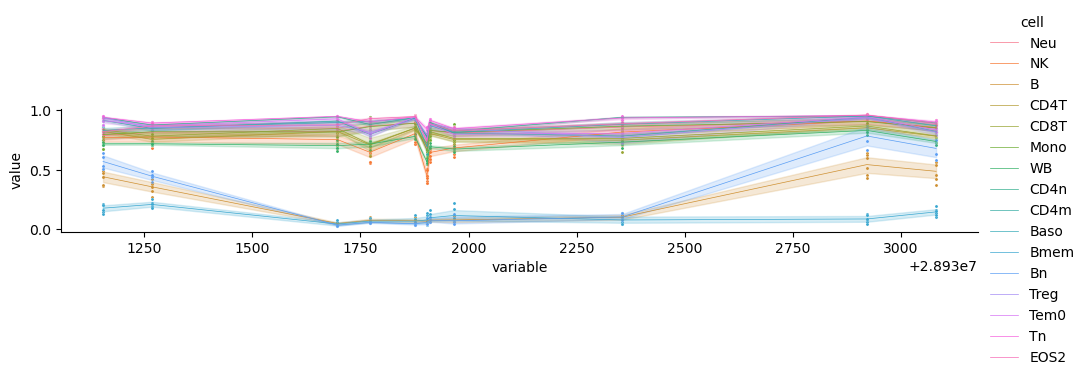

In [139]:
cd19=man[man['gene']=='CD19'][['pos']].sort_values('pos')
cd19=cd19.join(dnam)
cd19_ind=cd19['pos']
cd19.index=cd19['pos']
cd19=cd19.drop('pos',axis=1).T.join(meta.rename('cell'))
plm=cd19.melt('cell')
g = sns.FacetGrid(plm, hue='cell',height=2, aspect=5, )
g.map(sns.scatterplot, "variable", "value",s=5)
g.map(sns.lineplot, "variable", "value",linewidth = .5);
g.add_legend()

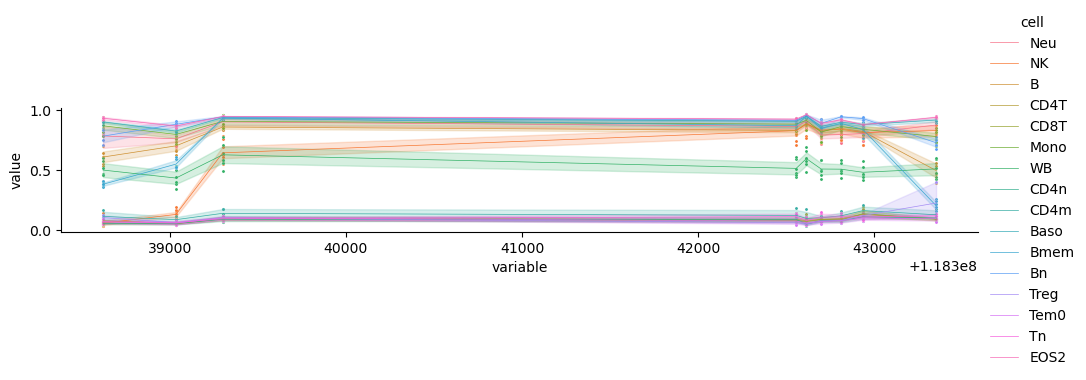

In [141]:
cd3=man[(man['gene']=='CD3D')][['pos']].sort_values('pos')
cd3=cd3.join(dnam)
cd3_ind=cd3['pos']
cd3.index=cd3['pos']
cd3=cd3.drop('pos',axis=1).T.join(meta.rename('cell'))
plm=cd3.melt('cell')
g = sns.FacetGrid(plm, hue='cell',height=2, aspect=5, )
g.map(sns.scatterplot, "variable", "value",s=5)
g.map(sns.lineplot, "variable", "value",linewidth = .5);
g.add_legend()

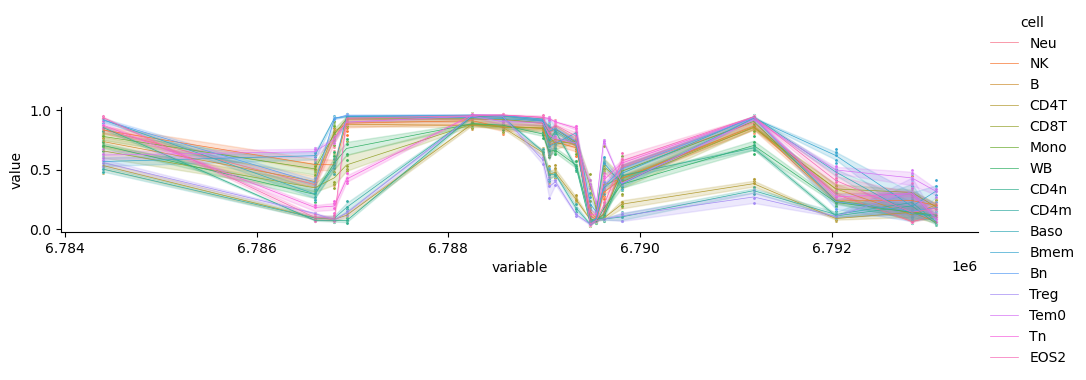

In [142]:
cd4=man[(man['gene']=='CD4')][['pos']].sort_values('pos')
cd4=cd4.join(dnam)
cd4_ind=cd4['pos']
cd4.index=cd4['pos']
cd4=cd4.drop('pos',axis=1).T.join(meta.rename('cell'))
plm=cd4.melt('cell')
g = sns.FacetGrid(plm, hue='cell',height=2, aspect=5, )
g.map(sns.scatterplot, "variable", "value",s=5)
g.map(sns.lineplot, "variable", "value",linewidth = .5);
g.add_legend()

In [12]:
wb_mix=wb.metadata[['cd4t_proportion','cd8t_proportion','bcell_proportion','nk_proportion','monocytes_proportion','neutrophils_proportion']].T
wb_mix.index=meta_mix.index

In [13]:
mix=meta_mix.join(wb_mix).T

In [14]:
dnam_mix=dnam_mix.join(wb.dnam)

In [25]:
cd19_mix=dnam_mix.loc[cd19_ind.index].T.join(mix).head(12)
cd19_mix.corr()

,cg07597976,cg06323049,cg27565966,cg10571406,cg05433111,cg01758575,cg14102807,CD4,CD8,B,NK,Mono,Neu
cg07597976,1.000000,0.942604,0.974894,0.985572,0.966868,0.962974,0.956184,0.055701,-0.300924,-0.954850,-0.804946,-0.593587,0.765404
cg06323049,0.942604,1.000000,0.974935,0.919716,0.970770,0.963505,0.953991,-0.070249,-0.477246,-0.959233,-0.872972,-0.682001,0.888477
cg27565966,0.974894,0.974935,1.000000,0.961514,0.987289,0.973103,0.975243,-0.026223,-0.372806,-0.977190,-0.871382,-0.636222,0.837648
cg10571406,0.985572,0.919716,0.961514,1.000000,0.959243,0.938090,0.950025,0.091283,-0.246763,-0.944077,-0.778837,-0.558092,0.721454
cg05433111,0.966868,0.970770,0.987289,0.959243,1.000000,0.964471,0.961637,-0.043236,-0.335501,-0.976785,-0.847495,-0.566484,0.801117
cg01758575,0.962974,0.963505,0.973103,0.938090,0.964471,1.000000,0.969937,0.106657,-0.443296,-0.968797,-0.847650,-0.659483,0.843011
cg14102807,0.956184,0.953991,0.975243,0.950025,0.961637,0.969937,1.000000,0.102582,-0.401260,-0.964699,-0.869695,-0.616057,0.820728
CD4,0.055701,-0.070249,-0.026223,0.091283,-0.043236,0.106657,0.102582,1.000000,-0.327061,-0.011349,-0.109170,-0.070513,0.034114
CD8,-0.300924,-0.477246,-0.372806,-0.246763,-0.335501,-0.443296,-0.401260,-0.327061,1.000000,0.345105,0.653673,0.669791,-0.772626
B,-0.954850,-0.959233,-0.977190,-0.944077,-0.976785,-0.968797,-0.964699,-0.011349,0.345105,1.000000,0.835848,0.654081,-0.825797


In [28]:
cd3_ind.index

Index(['cg07728874', 'cg24841244', 'cg03074244', 'cg16036316', 'cg06026786'], dtype='object', name='IlmnID')

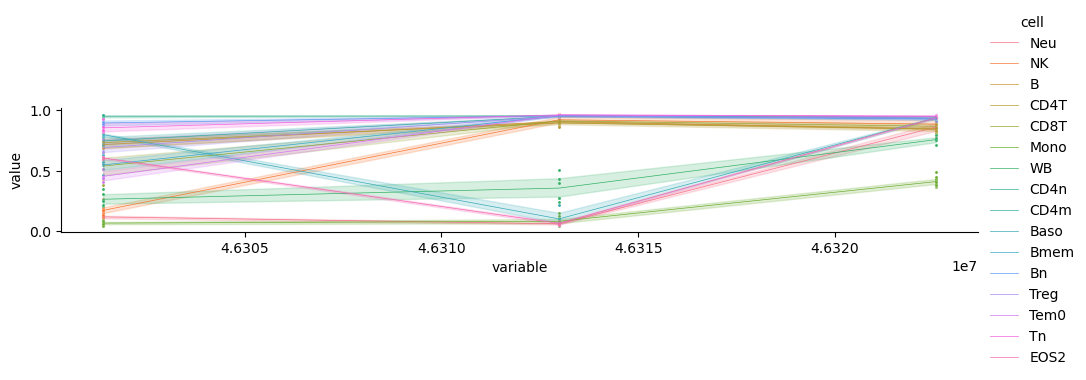

In [18]:
### Change cd3
cd3=man[(man['gene']=='CCR2')][['pos']].sort_values('pos').iloc[:]
cd3=man[(man['g'].between(3046312989-12000,3046312989+10000))][['pos']].sort_values('pos')
cd3=cd3.join(dnam)
ind=cd3['pos']
cd3.index=cd3['pos']
cd3=cd3.drop('pos',axis=1).T.join(meta.rename('cell'))
plm=cd3.melt('cell')
g = sns.FacetGrid(plm, hue='cell',height=2, aspect=5, )
g.map(sns.scatterplot, "variable", "value",s=5)
g.map(sns.lineplot, "variable", "value",linewidth = .5);
g.add_legend()

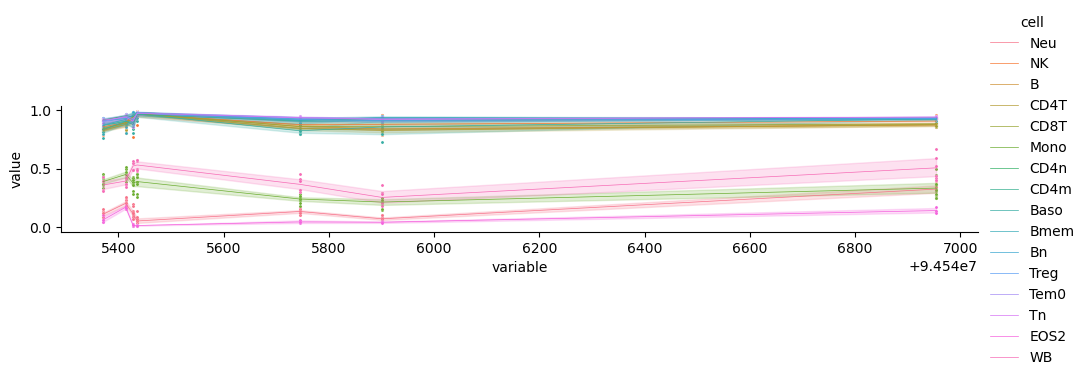

In [442]:
cd15=man[(man['g'].between(11094545300,11094547000))][['pos']].sort_values('pos')
cd15=cd15.join(dnam)
ind=cd15['pos']
cd15.index=cd15['pos']
cd15=cd15.drop('pos',axis=1).T.join(meta.rename('cell'))
plm=cd15.melt('cell')
g = sns.FacetGrid(plm, hue='cell',height=2, aspect=5, )
g.map(sns.scatterplot, "variable", "value",s=5)
g.map(sns.lineplot, "variable", "value",linewidth = .5);
g.add_legend()

In [ ]:
wbd=wb.dnam.T[ind.index[:-2]]

In [ ]:
wbd['m']=wbd.median(1)

In [ ]:
pro=(1-wbd).join(wb.metadata[['cd8t_proportion']]).sort_values('cd8t_proportion')

In [ ]:
pro.corr()

,cg16639798,cg02125896,cg04217471,cg00366435,cg15533155,cg16875554,cg24219128,cg16470760,cg23783751,cg05044173,cg06624527,cg14665192,cg13512987,cg22908581,cg03855955,cg26328534,m,cd8t_proportion
cg16639798,1.000000,-0.119846,0.512538,0.346474,0.561563,0.458927,-0.191756,0.801385,0.713673,0.757243,-0.962204,-0.839069,-0.822777,0.553668,0.587804,-0.473316,0.642997,0.888886
cg02125896,-0.119846,1.000000,0.581277,0.752474,0.661244,0.586574,0.801588,0.349441,0.123980,0.529445,0.231944,0.415002,0.298710,0.583692,0.619595,0.414765,0.617788,0.002447
cg04217471,0.512538,0.581277,1.000000,0.953342,0.559218,0.515278,0.530978,0.590528,0.588106,0.841994,-0.529832,-0.405241,-0.468415,0.506032,0.855469,0.078069,0.955841,0.555137
cg00366435,0.346474,0.752474,0.953342,1.000000,0.624180,0.654518,0.591644,0.502276,0.387872,0.774557,-0.315376,-0.135705,-0.197520,0.537195,0.804244,0.314670,0.914241,0.350837
cg15533155,0.561563,0.661244,0.559218,0.624180,1.000000,0.868778,0.326770,0.811549,0.436009,0.852757,-0.391372,-0.127982,-0.164028,0.959056,0.728858,0.020649,0.761446,0.518946
cg16875554,0.458927,0.586574,0.515278,0.654518,0.868778,1.000000,0.083503,0.525663,0.067894,0.663585,-0.296065,0.006858,0.068958,0.799563,0.493949,0.413962,0.646323,0.221348
cg24219128,-0.191756,0.801588,0.530978,0.591644,0.326770,0.083503,1.000000,0.344339,0.408029,0.397723,0.244421,0.292088,0.032223,0.220854,0.674276,-0.011752,0.511376,0.159333
cg16470760,0.801385,0.349441,0.590528,0.502276,0.811549,0.525663,0.344339,1.000000,0.856004,0.894022,-0.674906,-0.502965,-0.645112,0.744804,0.872065,-0.512774,0.781949,0.899244
cg23783751,0.713673,0.123980,0.588106,0.387872,0.436009,0.067894,0.408029,0.856004,1.000000,0.749569,-0.702126,-0.682242,-0.867386,0.402400,0.819503,-0.751120,0.681161,0.952382
cg05044173,0.757243,0.529445,0.841994,0.774557,0.852757,0.663585,0.397723,0.894022,0.749569,1.000000,-0.693826,-0.517127,-0.575993,0.833683,0.911465,-0.198825,0.958650,0.792114


CPU times: user 992 ms, sys: 40.1 ms, total: 1.03 s
Wall time: 1.87 s


<Axes: xlabel='PC1', ylabel='PC2'>

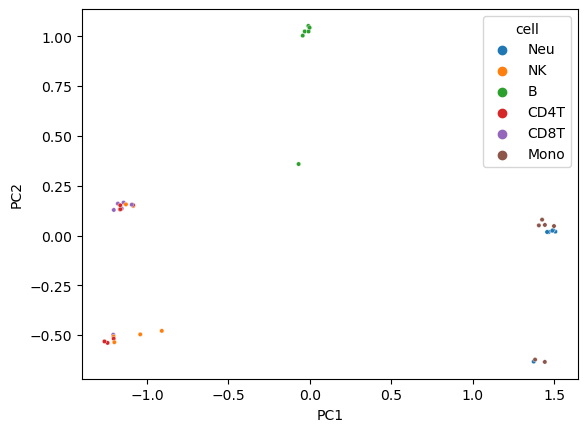

In [198]:
%%time
dd=df-wb.dnam.median()
st=dd.std().sort_values().tail(10).index
palette = sns.color_palette("coolwarm", as_cmap=True)

pca = PCA(n_components=2)
pc_df = pd.DataFrame(pca.fit_transform(dd[st]),
                                    columns=['PC1', 'PC2'],index=dd.index);
sns.scatterplot(data=pc_df, x='PC1', y='PC2', s=10, hue=cells)

<Axes: xlabel='PC1', ylabel='PC2'>

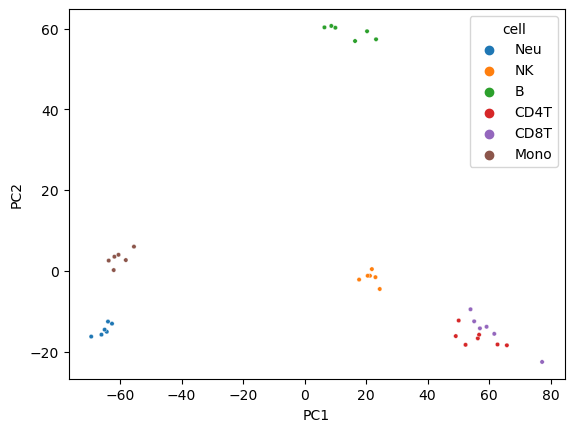

In [39]:
df['T']=df[['CD4T','CD8T']].median(1)
df.drop(['CD4T','CD8T'],axis=1,inplace=True)

In [83]:
for c in df.columns:
    df[c]=df[c]-reference_dataset.dnam.median(1)

In [89]:
palette = sns.color_palette("coolwarm", as_cmap=True)

pca = PCA(n_components=3)
pc_df = pd.DataFrame(pca.fit_transform(df),
                                    columns=['PC1', 'PC2','PC3'],index=df.index)
pc_df=pc_df.join(df)

<Axes: xlabel='PC1', ylabel='PC2'>

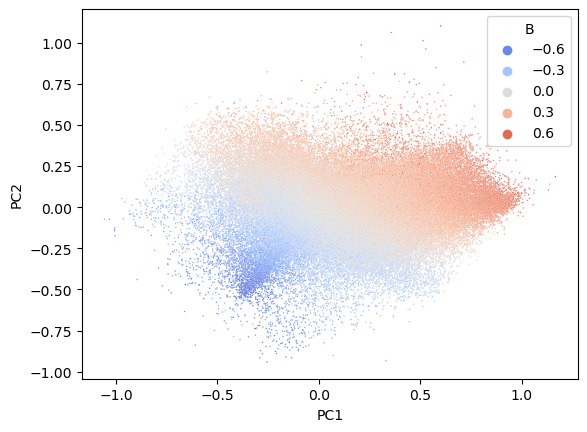

In [90]:
sns.scatterplot(x='PC1', y='PC2', hue='B',data=pc_df,palette = palette, s=1)

<Axes: xlabel='PC1', ylabel='PC2'>

/PHShome/mm1286/anaconda3/envs/p311/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/PHShome/mm1286/anaconda3/envs/p311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


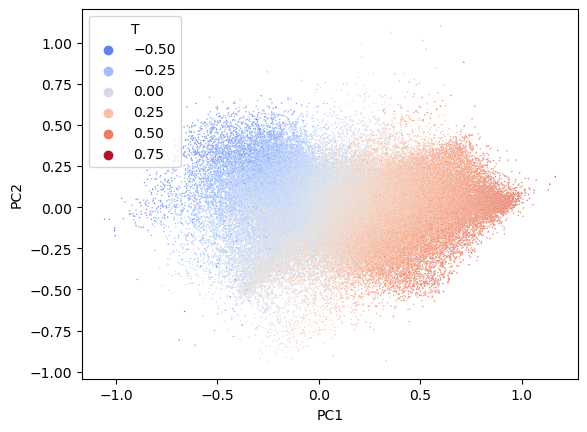

In [91]:
sns.scatterplot(x='PC1', y='PC2', hue='T',data=pc_df,palette = palette, s=1)

In [96]:
cf=pc_df.head(1000000)

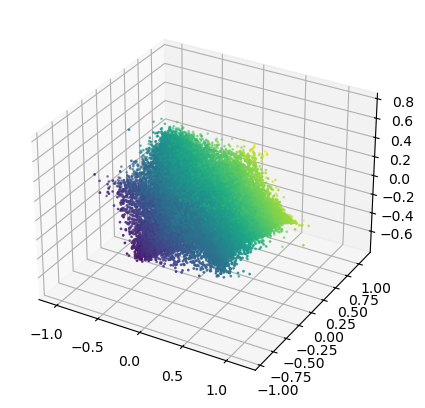

In [97]:
fig = plt.figure(figsize=(5,5))
pl = fig.add_subplot(111, projection='3d')
pl.scatter(cf['PC1'],cf['PC2'],cf['PC3'], 
            c=cf['B'],s=1)

In [98]:
pc_df.corr()

,PC1,PC2,PC3,B,Mono,NK,Neu,T
PC1,1.000000e+00,3.908189e-17,1.034304e-16,0.694431,-0.383709,0.775069,-0.680825,0.907027
PC2,3.908189e-17,1.000000e+00,-2.721189e-16,0.618573,0.723049,0.089087,0.390350,-0.243999
PC3,1.034304e-16,-2.721189e-16,1.000000e+00,0.346766,-0.317000,-0.590164,-0.246238,0.034883
B,6.944307e-01,6.185734e-01,3.467661e-01,1.000000,0.013321,0.412937,-0.306291,0.454698
Mono,-3.837087e-01,7.230492e-01,-3.169997e-01,0.013321,1.000000,-0.134692,0.534353,-0.408960
NK,7.750691e-01,8.908680e-02,-5.901641e-01,0.412937,-0.134692,1.000000,-0.364075,0.591568
Neu,-6.808249e-01,3.903499e-01,-2.462383e-01,-0.306291,0.534353,-0.364075,1.000000,-0.652930
T,9.070269e-01,-2.439994e-01,3.488271e-02,0.454698,-0.408960,0.591568,-0.652930,1.000000


In [10]:
sal=ModelGallery().get("DeconvoluteBloodEPIC").predict(reference_dataset)

Estimating cell proportions using 'EPIC' platform reference...
Number of CpGs in reference: 600
Number of CpGs in methylation data intersecting with reference CpGs: 600
Running deconvolution...
Deconvolution complete!


In [ ]:
sal

,GSM3074480,GSM3074481,GSM3074482,GSM3074483,GSM3074484,GSM3074485
neutrophil,0.628561,0.485662,0.692731,0.402909,0.704129,0.442868
nk_cell,0.003215,0.057893,0.013019,0.033238,0.016283,0.032167
b_cell,0.008464,0.049882,0.044065,0.077114,0.034580,0.060856
cd4_t_cell,0.205578,0.182483,0.100740,0.269972,0.093419,0.154430
cd8_t_cell,0.072361,0.152587,0.070950,0.148527,0.078764,0.192139
monocyte,0.081821,0.071494,0.078494,0.068241,0.072825,0.117540


In [12]:
reference_dataset.metadata

,sample_well,chip,sex,age,array,slide,cd4t_proportion,cd8t_proportion,nk_proportion,bcell_proportion,monocytes_proportion,granulocytes_proportion,neutrophils_proportion
id,,,,,,,,,,,,,
GSM3074480,B01,1,2,54.0,R02C01,404327060012/2,0.181738794,0.061719145,0.019415308,0.01772118,0.061406893,0.590642372,0.534332
GSM3074481,C01,1,2,34.0,R03C01,404327060012/2,0.181012751,0.098584369,0.047482283,0.047810635,0.05205543,0.465698888,0.435131
GSM3074482,D01,1,2,33.0,R04C01,404327060012/2,0.119645952,0.05866101,0.027510185,0.042616993,0.060388516,0.661889432,0.650903
GSM3074483,F01,1,2,34.0,R06C01,404327060012/2,0.243650764,0.123119159,0.02456598,0.066199561,0.054881227,0.399642766,0.342468
GSM3074484,G01,1,1,46.0,R07C01,404327060012/2,0.11003834,0.047160888,0.026188677,0.039635017,0.059569858,0.678296954,0.640848
GSM3074485,H01,1,2,56.0,R08C01,404327060012/2,0.1619252,0.152631535,0.048088244,0.059132822,0.086664369,0.440635471,0.375769


In [14]:
reference_dataset.dnam

,GSM3074480,GSM3074481,GSM3074482,GSM3074483,GSM3074484,GSM3074485
id,,,,,,
cg00000029,0.394609,0.499356,0.420688,0.511384,0.423383,0.475624
cg00000103,0.820814,0.868471,0.877737,0.881063,0.841882,0.885243
cg00000109,0.877917,0.837191,0.849179,0.797947,0.822006,0.879849
cg00000155,0.887997,0.889705,0.894313,0.911488,0.917205,0.906420
cg00000158,0.908412,0.906269,0.924033,0.904923,0.903638,0.894823
...,...,...,...,...,...,...
ch.X.97129969R,0.052833,0.029799,0.039415,0.049626,0.035136,0.033918
ch.X.97133160R,0.060246,0.068864,0.066268,0.034380,0.045261,0.061242
ch.X.97651759F,0.015845,0.023144,0.027239,0.023470,0.029015,0.023601
